In [1]:
%pylab inline

# Normal Python libraries
import numpy as np
import netCDF4 as netCDF  # file format
import tracpy
import tracpy.plotting
from tracpy.tracpy_class import Tracpy
import tracpy.calcs
import os
import cmocean.cm as cmo
import cartopy
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
loc = "http://copano.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"

In [14]:
# Number of days to run the drifters.
ndays = 5
tseas = 3600 # 1 hour between outputs, in seconds 
time_units = 'seconds since 1970-01-01'
nsteps = 5
N = 1
ff = -1
ah = 0. # m^2/s HORIZONTAL
av = 0. # m^2/s VERTICAL
doturb = 0   # turbulence/diffusion flag

In [15]:
#### 3D Sample Options ####
# for 3d flag, do3d=0 makes the run 2d and do3d=1 makes the run 3d
do3d = 1

## Choose method for vertical placement of drifters
zpar = 'fromZeta' # starting depth below the time-dependent sea surface
####

proj = tracpy.tools.make_proj('nwgom-pyproj')

In [16]:
## boundaries from https://flowergarden.noaa.gov/visiting/buoyboundary.html

grid = tracpy.inout.readgrid(loc, proj, usespherical=True)



layers = 3

## East Bank
# N: 27.98399444
# E: -93.57083333
# S: 27.88140000
# W: -93.64472222       
elon, elat = (-93.57083333-93.64472222) / 2. , (27.98399444+27.88140000) / 2.
elonrange = max( abs( abs(elon)-93.57083333 ), abs( abs(elon)-93.64472222 ) )
elatrange = max( abs( abs(elat)-27.98399444 ), abs( abs(elat)-27.88140000 ) )
elonlow = elon - elonrange
elonupp = elon + elonrange
elatlow = elat - elatrange
elatupp = elat + elatrange

## West Bank
# N: 27.91719722
# E: -93.78055556
# S: 27.81976111
# W: -93.88111111
wlon, wlat = (-93.78055556-93.88111111) / 2. , (27.91719722+27.81976111) / 2.
wlonrange = max( abs( abs(wlon)-93.78055556 ), abs( abs(wlon)-93.88111111 ) )
wlatrange = max( abs( abs(wlat)-27.91719722 ), abs( abs(wlat)-27.81976111 ) )
wlonlow = wlon - wlonrange
wlonupp = wlon + wlonrange
wlatlow = wlat - wlatrange
wlatupp = wlat + wlatrange

dx = 1000  # drifter spacing in meters 
ex, ey = proj([elonlow, elonupp], [elatlow, elatupp])
eX, eY = np.meshgrid(np.arange(ex[0], ex[1], dx), np.arange(ey[0], ey[1], dx))

wx, wy = proj([wlonlow, wlonupp], [wlatlow, wlatupp])
wX, wY = np.meshgrid(np.arange(wx[0], wx[1], dx), np.arange(wy[0], wy[1], dx))

ewX = np.append(eX,wX)
ewY = np.append(eY,wY)

X,Y = [],[]
for layer in range(layers):
    X = np.append(X,ewX)
    Y = np.append(Y,ewY)

In [17]:
# finding z
# depths = tracpy.calcs.Var(X,Y,0,"h",netCDF.Dataset(loc))
# -625.32748994 m everywhere at the banks


zsur = np.array([0] * 206)
ztop = np.array([-24] * 206)
zbot = np.array([-50] * 206)

z0 = np.concatenate((zsur,ztop,zbot))

print(z0.shape,X.shape,Y.shape)

(618,) (618,) (618,)


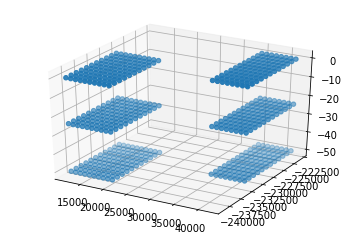

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,z0)

0 / 618  drifters NaN-ed out.


/opt/tracpy/tracpy/inout.py:75: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  istart = find(dates <= date)[-1]
/opt/tracpy/tracpy/tracpy_class.py:350: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ka[i] = find(ind)[-1]


Using GCM model output index  0


/opt/tracpy/tracpy/tracpy_class.py:490: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.z0 != 's' and self.savell:


Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output index  29
Using GCM model output index  30
Using GCM model out

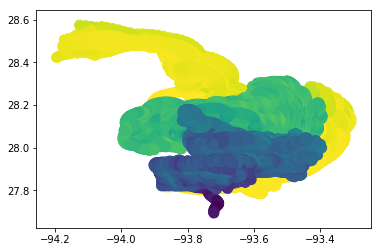

0 / 618  drifters NaN-ed out.
Using GCM model output index  0
Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output 

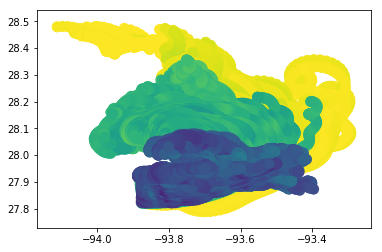

0 / 618  drifters NaN-ed out.
Using GCM model output index  0
Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output 

KeyboardInterrupt: 

In [19]:

years = np.arange(1996,1997)

for year in years:
    month = 7   # July
    days = np.arange(1,4)
    for day in days:
        date = datetime.datetime(year, month, day, 0)
        name = "test3d_%dJuly%d" %(year,day) # 3d_2005July27
        if not os.path.exists('tracks/' + name + '.nc') and not os.path.exists('tracks/' + name + 'gc.nc'):
            tp = Tracpy(loc, grid, name=name, tseas=tseas, ndays=ndays, 
                        nsteps=nsteps,N=N, ff=ff, ah=ah, av=av, doturb=doturb, 
                        do3d=do3d, z0=z0, zpar=zpar, time_units=time_units)
            
            lon0, lat0 = tp.grid.proj(X, Y, inverse=True)
            lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
            lonp, latp, zp, t, T0, U, V = tracpy.run.run(tp, date, lon0, lat0)
            plt.scatter(lonp, latp, s=100, c=zp)
            plt.show()

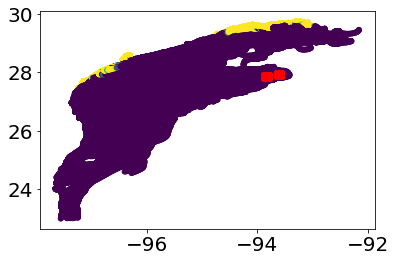

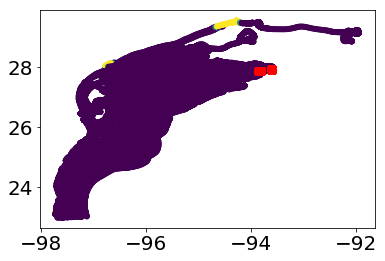

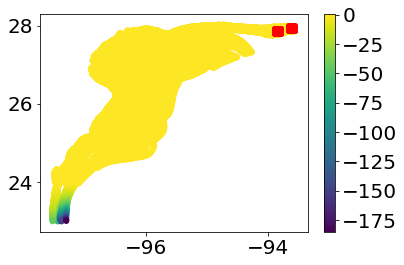

In [250]:
#tracpy.calcs.Var gives 625 for the depth when I pass in the projected coordinates and 2608 when I pass in the longitude and the latitude. Those numbers seem very 


plt.scatter(lonp[0:206], latp[0:206], s=100, c=zp[0:206], marker=".")
plt.plot(lon0,lat0,"ro")
plt.show()

plt.scatter(lonp[206:412], latp[206:412], s=100, c=zp[206:412], marker=".")
plt.plot(lon0,lat0,"ro")
plt.show()

plt.scatter(lonp[412:618], latp[412:618], s=100, c=zp[412:618], marker=".")
plt.plot(lon0,lat0,"ro")
plt.colorbar()
plt.show()


In [87]:
print(lon.shape,lat.shape,depths.shape)
print(tp.grid.lon_rho.shape, tp.grid.lat_rho.shape, tp.grid.h.shape)

(206,) (206,) (206,)
(191, 671) (191, 671) (191, 671)


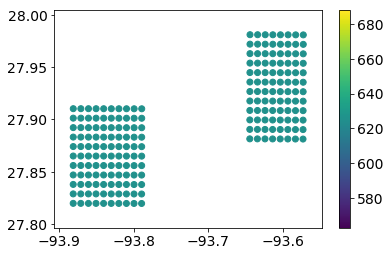

In [108]:
plt.scatter(lon,lat,c=depths)
plt.colorbar()

In [102]:
zsurf = np.array([0] * 206)
zdept = np.array([-50] * 206)


206


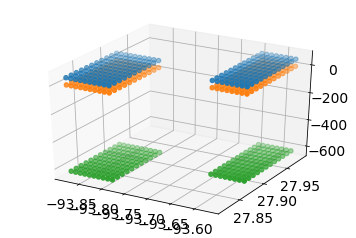

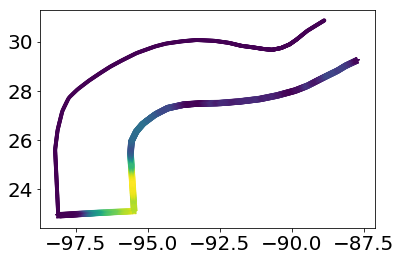

[[3062.44353121 3052.41791844 3043.85256726 ...  652.49188119
   636.52705503  625.32748994]
 [3042.51005519 3032.22568384 3022.55833013 ...  598.34443354
   581.33095882  573.81874195]
 [3022.58866131 3012.21572502 3002.02054913 ...  542.83258037
   525.37549794  517.881682  ]
 ...
 [   5.            5.            5.         ...    5.
     5.            5.        ]
 [   5.            5.            5.         ...    5.
     5.            5.        ]
 [   5.            5.            5.         ...    5.
     5.            5.        ]]
-- / 2695  drifters NaN-ed out.
681


In [14]:
# import cmocean as cm
plt.scatter(tp.grid.lon_rho[-1,:], tp.grid.lat_rho[-1,:],  c=tp.grid.h[-1,:], marker=".")
plt.scatter(tp.grid.lon_rho[0,:], tp.grid.lat_rho[0,:],  c=tp.grid.h[0,:], marker="*")
plt.scatter(tp.grid.lon_rho[:,0], tp.grid.lat_rho[:,0],  c=tp.grid.h[:,0], marker="*")
plt.scatter(tp.grid.lon_rho[0,:], tp.grid.lat_rho[0,:],  c=tp.grid.h[0,:], marker="*")
plt.show()
#plt.colorbar()


print(tp.grid.h[:])
# tp.grid.h.shape



# Input starting locations as real space lon,lat locations
lon0, lat0 = np.meshgrid(np.linspace(-98.5,-87.5,55), \
                            np.linspace(22.5,31,49)) # whole domain, 20 km

# Eliminate points that are outside domain or in masked areas
lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
print(lon0.size)